# Plots for the 2MDM analysis

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os,shutil
from pandas import json_normalize

import pyslha
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d, griddata
from itertools import product
from IPython.display import display, Markdown

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

/var/folders/b3/l10x2d9503j4vrszk86wqw040000gn/T/ipykernel_66440/1200496628.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import glob,imp,os,shutil
/var/folders/b3/l10x2d9503j4vrszk86wqw040000gn/T/ipykernel_66440/1200496628.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


### Scan over $\alpha$ 

In [2]:
#Merge with SModelS DataFrame
# pclFiles = {'all': '../../data/2mdm_results_scan_alpha_v3/all/results.pcl',
#             'zp': '../../data/2mdm_results_scan_alpha_v3/zp_only/results.pcl',
#             'sd': '../../data/2mdm_results_scan_alpha_v3/sd_only/results.pcl'}
# pclFiles = {'sd': '../scan/data/pcl_files/smodels_results_scan_alpha.pcl'}
pclFiles = ['../scan/smodels_results_final.pcl']

dfs = [pd.read_pickle(i) for i in pclFiles]
dataDF = pd.concat(dfs, ignore_index=True)
print(dataDF.columns.values.tolist()) #Print all columns names

['filename', 'mass.9000006', 'mass.9900026', 'mass.9900032', 'mass.9000002', 'mass.9000003', 'mass.9000004', 'mass.9000005', 'width.9000002', 'width.9000003', 'width.9000004', 'width.9000005', 'width.9000006', 'width.9900026', 'width.9900032', 'extpar.1', 'extpar.2', 'extpar.3', 'extpar.4', 'xsec8TeV(fb).9900032', 'xsec8TeV(fb).9900026', 'xsec13TeV(fb).9900032', 'xsec13TeV(fb).9900026', 'BRs.sd.W-,W+', 'BRs.sd.higgs,higgs', 'BRs.sd.Z,Z', 'BRs.sd.t-,t+', 'BRs.sd.chi,chi', 'BRs.zp.chi,chi', 'BRs.zp.c,c', 'BRs.zp.q,q', 'BRs.zp.b,b', 'BRs.zp.t-,t+', 'BRs.sd.ta+,ta-', 'totalxsec13TeV(fb)', 'totalxsec8TeV(fb)', 'CombinedRes', 'Total xsec for missing topologies (fb)', 'Total xsec for missing topologies with displaced decays (fb)', 'Total xsec for missing topologies with prompt decays (fb)', 'Total xsec for topologies outside the grid (fb)', 'OutputStatus.sigmacut', 'OutputStatus.minmassgap', 'OutputStatus.maxcond', 'OutputStatus.ncpus', 'OutputStatus.model', 'OutputStatus.promptwidth', 'Outpu

In [3]:
#Set points without results with r == 0
dataDF.fillna(value={c : 0 for c in dataDF.columns if c.endswith('.r')}, inplace=True)
#Sort points according to r value:
dataDF = dataDF.sort_values(by=['ExptRes.result0.r'],ascending=False)

In [4]:
idCols = [c for c in dataDF.columns if 'AnalysisID' in c]
txCols = [c for c in dataDF.columns if 'TxNames' in c]

In [5]:
ana, tx = [], []
for c in idCols:
    for i in dataDF[c].dropna().unique():
        ana.append(i)
        
for c in txCols:
    for txlist in dataDF[c].dropna():
        for i in txlist:
            tx.append(i)

In [6]:
dataDF.T

,7870,15722,7280,13414,13814,6654,10870,17799,9294,17911,...,540,4842,13413,16758,16012,5891,5411,9904,16233,8430
filename,scan_1_x8s0ganz.slha,scan_1_9_d4iueu.slha,scan_1_f2hxwynt.slha,scan_1__dd6sov0.slha,scan_1_0k0zh_zo.slha,scan_1_523lzen_.slha,scan_1_obwiewyj.slha,scan_1_2nj6ro61.slha,scan_1_z93mj1nv.slha,scan_1_apuw0kcl.slha,...,scan_3_cnpov454.slha,scan_3_q2vtjw2_.slha,scan_3_fem5yqse.slha,scan_3_yc8wz3_n.slha,scan_3_me8wb4e_.slha,scan_3_6_9pvwxm.slha,scan_3_ggc2oslt.slha,scan_3_brydg4eq.slha,scan_3_j67dusfk.slha,scan_3_6dtd_hhw.slha
mass.9000006,65.31481,68.05573,75.12405,75.51093,69.50408,71.4223,67.87453,70.02504,66.72025,73.12412,...,1600.0,1600.0,1600.0,1600.0,1600.0,1600.0,1600.0,1600.0,1600.0,1600.0
mass.9900026,150.5569,150.1,156.4955,157.4091,165.6319,142.3341,168.8296,132.7409,169.7432,162.4341,...,135.025,134.1114,148.7296,138.6796,133.6546,133.1977,139.1364,149.1864,154.6682,132.2841
mass.9900032,301.1137,300.2001,312.991,314.8183,331.2638,284.6682,337.6592,265.4818,339.4865,324.8683,...,270.05,268.2227,297.4592,277.3591,267.3091,266.3955,278.2728,298.3728,309.3364,264.5682
mass.9000002,91.1876,91.1876,91.1876,91.1876,91.1876,91.1876,91.1876,91.1876,91.1876,91.1876,...,91.1876,91.1876,91.1876,91.1876,91.1876,91.1876,91.1876,91.1876,91.1876,91.1876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ExptRes.result8.r_expected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExptRes.result8.Width (GeV),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExptRes.result8.nll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExptRes.result8.nll_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
txnames = pd.Series(tx).drop_duplicates().tolist()
analysis = pd.Series(ana).drop_duplicates().tolist()

In [8]:
filteredDF = []
# anaID = analysis
# txID = txnames
for irow,row in dataDF.iterrows():
    for anaID in analysis:
        for txID in txnames:
            # resCols = [idc for idc in idCols if (row[idc] == anaID and (row[idc.replace('AnalysisID','TxNames')] == [txID]
            #                                                            or row[idc.replace('AnalysisID','TxNames')] == ['TRS1', 'TRV1']))]
            resCols = [idc for idc in idCols if (row[idc] == anaID)]
            if not resCols:
                continue
            resCol = resCols[0].rsplit('.',1)[0]
            newrow = {c.replace(resCol,'ExptRes.result') : row[c] for c in dataDF.columns if (('ExptRes' not in c) or (resCol in c))}
            filteredDF.append(newrow)  

In [9]:
newDF = pd.DataFrame.from_dict(filteredDF)

In [14]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', None)

In [19]:
newDF.T

,0,1,2,3,4,...,492271,492272,492273,492274,492275
filename,scan_1_x8s0ganz.slha,scan_1_x8s0ganz.slha,scan_1_x8s0ganz.slha,scan_1_x8s0ganz.slha,scan_1_x8s0ganz.slha,...,scan_1_sy0sbbb6.slha,scan_1_sy0sbbb6.slha,scan_1_sy0sbbb6.slha,scan_1_sy0sbbb6.slha,scan_1_sy0sbbb6.slha
mass.9000006,65.31481,65.31481,65.31481,65.31481,65.31481,...,408.1935,408.1935,408.1935,408.1935,408.1935
mass.9900026,150.5569,150.5569,150.5569,150.5569,150.5569,...,408.2027,408.2027,408.2027,408.2027,408.2027
mass.9900032,301.1137,301.1137,301.1137,301.1137,301.1137,...,816.4055,816.4055,816.4055,816.4055,816.4055
mass.9000002,91.1876,91.1876,91.1876,91.1876,91.1876,...,91.1876,91.1876,91.1876,91.1876,91.1876
mass.9000003,79.82436,79.82436,79.82436,79.82436,79.82436,...,79.82436,79.82436,79.82436,79.82436,79.82436
mass.9000004,79.82436,79.82436,79.82436,79.82436,79.82436,...,79.82436,79.82436,79.82436,79.82436,79.82436
mass.9000005,1500.0,1500.0,1500.0,1500.0,1500.0,...,1500.0,1500.0,1500.0,1500.0,1500.0
width.9000002,2.4952,2.4952,2.4952,2.4952,2.4952,...,2.4952,2.4952,2.4952,2.4952,2.4952
width.9000003,2.085,2.085,2.085,2.085,2.085,...,2.085,2.085,2.085,2.085,2.085


In [17]:
newDF[(newDF['ExptRes.result.AnalysisID'] == 'CMS-EXO-20-004')&]['ExptRes.result.TxNames']

12              [TRV1]
13              [TRV1]
14              [TRV1]
15              [TRV1]
16              [TRV1]
17              [TRV1]
36              [TRV1]
37              [TRV1]
38              [TRV1]
39              [TRV1]
40              [TRV1]
41              [TRV1]
60              [TRV1]
61              [TRV1]
62              [TRV1]
63              [TRV1]
64              [TRV1]
65              [TRV1]
84              [TRV1]
85              [TRV1]
86              [TRV1]
87              [TRV1]
88              [TRV1]
89              [TRV1]
108             [TRV1]
109             [TRV1]
110             [TRV1]
111             [TRV1]
112             [TRV1]
113             [TRV1]
132             [TRV1]
133             [TRV1]
134             [TRV1]
135             [TRV1]
136             [TRV1]
137             [TRV1]
156       [TRS1, TRV1]
157       [TRS1, TRV1]
158       [TRS1, TRV1]
159       [TRS1, TRV1]
160       [TRS1, TRV1]
161       [TRS1, TRV1]
180             [TRV1]
181        

In [17]:
newDF[newDF['ExptRes.result.TxNames'].isin(['TRS1'])]

,filename,mass.9000006,mass.9900026,mass.9900032,mass.9000002,mass.9000003,mass.9000004,mass.9000005,width.9000002,width.9000003,...,ExptRes.result.DataSetID,ExptRes.result.AnalysisSqrts (TeV),ExptRes.result.lumi (fb-1),ExptRes.result.dataType,ExptRes.result.r,ExptRes.result.r_expected,ExptRes.result.Width (GeV),ExptRes.result.nll,ExptRes.result.nll_min,ExptRes.result.nll_SM


In [9]:
labels = []
for index, row in newDF.iterrows():
    ana = row['ExptRes.result.AnalysisID']
    txList = sorted(row['ExptRes.result.TxNames'])
    label = ana + ' (' + ','.join(txList) + ')'
    labels.append(label)
newDF['label'] = labels
newDF = newDF.replace(to_replace='CMS-EXO-20-004 (TRS1,TRV1)', value='CMS-EXO-20-004 (TRV1)')


In [10]:
dfAll = newDF[(newDF['process']=='all')&(newDF['ExptRes.result.AnalysisID']=='CMS-EXO-20-004')]

In [11]:
# plot values of r for sd only
dfSd = newDF[(newDF['process']=='sd')&(newDF['ExptRes.result.AnalysisID']=='CMS-EXO-20-004')]

In [12]:
dfSd = dfSd[dfSd['extpar.1']==1.414214]

In [13]:
zpMasses = dfSd['mass.9900032'].unique().tolist()

/var/folders/b3/l10x2d9503j4vrszk86wqw040000gn/T/ipykernel_95532/3716989211.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Spectral_r')


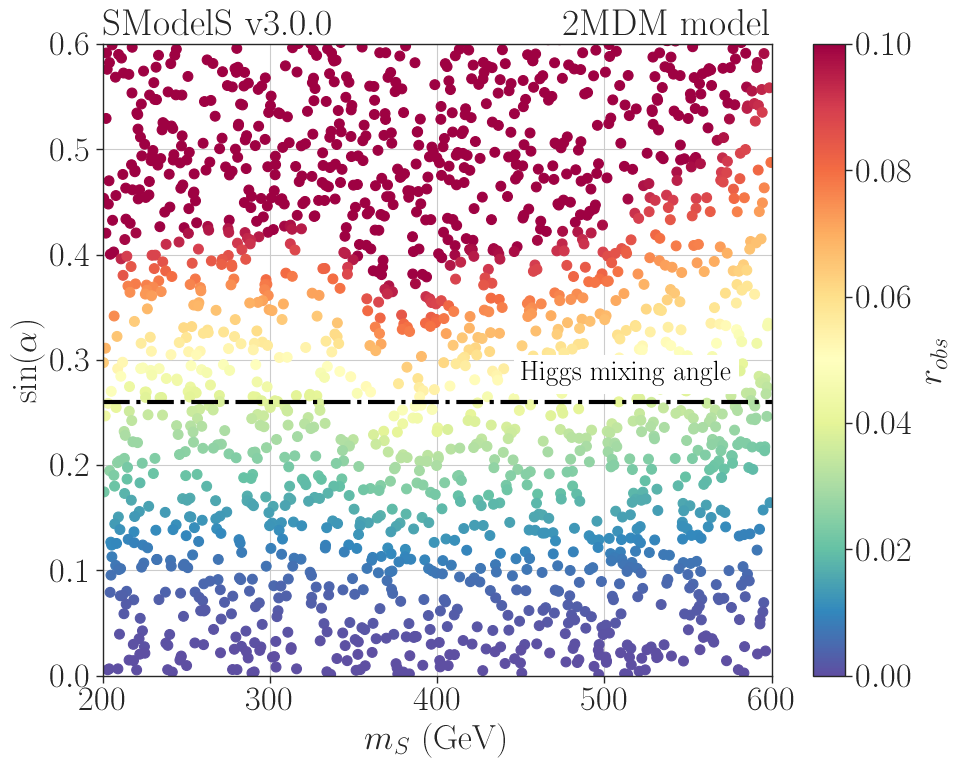

In [14]:
cm = plt.cm.get_cmap('Spectral_r')
plt.figure(figsize=(10,8))

mzp = 2000.0
data = dfSd[(dfSd['mass.9900032']==mzp)&(dfSd['ExptRes.result.r']>=0)]
x = data['mass.9900026']
y = data['extpar.6']
c = data['ExptRes.result.r']

plt.hlines(0.26, 200, 600, linestyle='dashdot', color='black',linewidth=3.0)
# plt.plot(atlas_curve['mS'], atlas_curve['sinalpha'])

im = plt.scatter(x,y,c=c,s=50,cmap=cm, vmin=0., vmax=0.1)
cb = plt.colorbar(im)
cb.set_label(label=r'$r_{obs}$', size=25)

#     ax[i].text(0.7,0.9,r"$m_{Z^{\prime}} = %1.2f$ GeV" %mzp,fontsize=15,
#                bbox=dict(facecolor='white', edgecolor='black'), transform=ax[i].transAxes)

plt.ylim(0,0.6)
plt.xlim(200,600)
    
plt.xlabel(r'$m_{S}$ (GeV)', fontsize=25)
plt.ylabel(r'$\sin(\alpha$)', fontsize=25)
    
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
im.figure.axes[0].tick_params(axis="both", labelsize=25) 
im.figure.axes[1].tick_params(axis="y", labelsize=25) 
plt.text(450., 0.28, r'Higgs mixing angle', color='black', backgroundcolor='white', fontsize=20)

plt.title(r'SModelS v3.0.0', loc='left', fontsize=27)
plt.title(r'2MDM model', loc='right', fontsize=27)

plt.grid()
plt.tight_layout()
# plt.savefig('./figures/2mdm_rs.png')

plt.show()

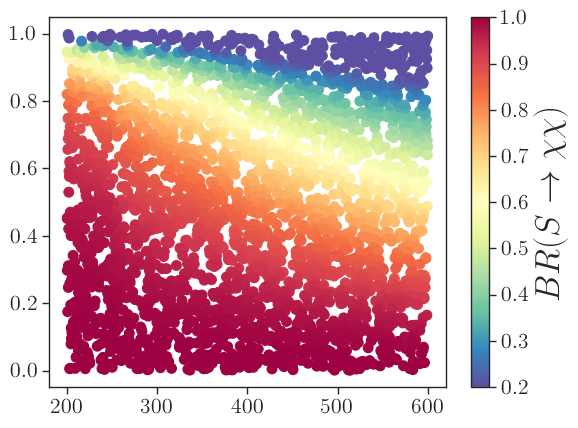

In [15]:
mzp = 2000.0
data = dfSd[(dfSd['mass.9900032']==mzp)&(dfSd['ExptRes.result.r']>=0)]
x = data['mass.9900026']
y = data['extpar.6']
c = data['BRs.sd.chi,chi']

im = plt.scatter(x,y,c=c,s=50,cmap=cm, vmin=0.2, vmax=1.0)
cb = plt.colorbar(im)
cb.set_label(label=r'$BR(S \to \chi \chi)$', size=25)

plt.show()